In [92]:
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,  
    confusion_matrix,
    RocCurveDisplay
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import pickle

import warnings
warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv('Cancer_Data.csv')

In [94]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [96]:
df.drop('Unnamed: 32', axis=True, inplace=True)
df.drop('id', axis=True, inplace=True)


In [97]:
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B':1})

In [98]:
df.columns = df.columns.str.replace(' ', '_')

In [99]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [100]:
X = df.drop('diagnosis', axis=True)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipepline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

grid_params = {'logreg__C': np.logspace(-3, 3, 7), 'logreg__penalty': ['l1','l2','elasticnet',None]}
Grid = GridSearchCV(pipepline, grid_params, cv=5, scoring='accuracy')

Grid.fit(X_train,y_train)

y_pred_train = Grid.predict(X_train)
y_pred = Grid.predict(X_test)

print('classification_report test\n')
print(f'{classification_report(y_test,y_pred)}')
print('classification_report train\n')
print(f'{classification_report(y_train,y_pred_train)}')
print('best Grid params')
print(Grid.best_params_)

classification_report test

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

classification_report train

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       169
           1       0.96      0.97      0.96       286

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

best Grid params
{'logreg__C': np.float64(0.001), 'logreg__penalty': None}


In [101]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

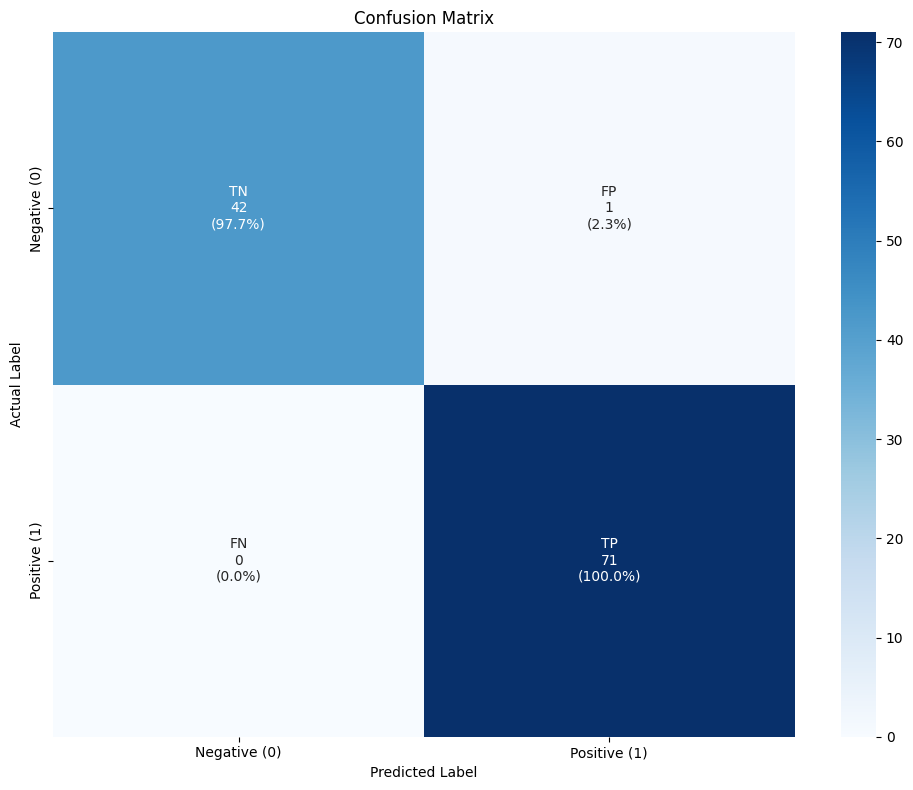

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm_percentages = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

labels = np.asarray([
    [f'TN\n{cm[0,0]}\n({cm_percentages[0,0]:.1f}%)', f'FP\n{cm[0,1]}\n({cm_percentages[0,1]:.1f}%)'],
    [f'FN\n{cm[1,0]}\n({cm_percentages[1,0]:.1f}%)', f'TP\n{cm[1,1]}\n({cm_percentages[1,1]:.1f}%)']
])

plt.figure(figsize=(10,8))
sns.heatmap(cm, fmt='', annot=labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.gca().set_xticklabels(['Negative (0)', 'Positive (1)'])
plt.gca().set_yticklabels(['Negative (0)', 'Positive (1)'])
plt.tight_layout()
plt.show()

In [103]:
train_acc = accuracy_score(y_train, Grid.predict(X_train))
test_acc = accuracy_score(y_test, Grid.predict(X_test))

print(f"Точность на тренировочных данных: {train_acc}")
print(f"Точность на тестовых данных: {test_acc}")

Точность на тренировочных данных: 0.9494505494505494
Точность на тестовых данных: 0.9912280701754386


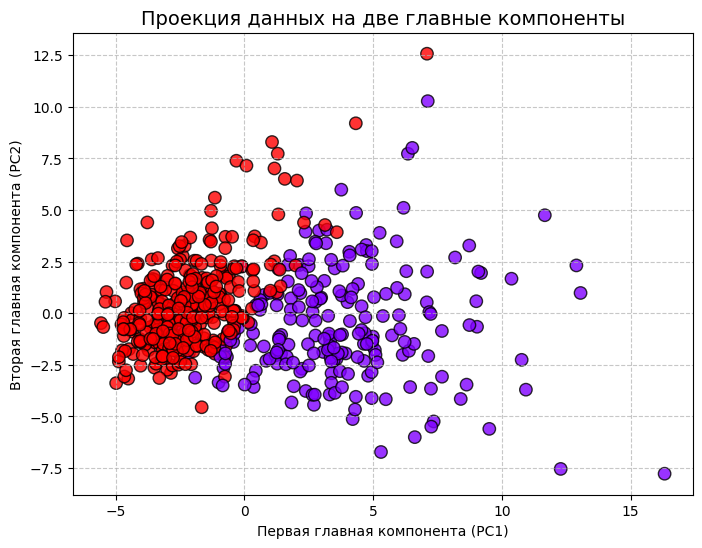

In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# Центрируем и нормализуем данные

# Применяем метод главных компонент (PCA), уменьшая размерность до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализируем данные в пространстве главных компонент
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap = 'rainbow', edgecolors='k',s = 80, alpha=0.8)
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.title('Проекция данных на две главные компоненты', fontsize = 14)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

In [105]:
# Выводим долю объясненной дисперсии каждой главной компоненты
print("\nОбъясненная дисперсия:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.2%}") # Доля объясненной дисперсии первой компоненты
print(f"PC2: {pca.explained_variance_ratio_[1]:.2%}") # Доля объясненной дисперсии второй компоненты
print(f"Суммарно: {sum(pca.explained_variance_ratio_):.2%}")  # Общая доля объясненной дисперсии


Объясненная дисперсия:
PC1: 44.27%
PC2: 18.97%
Суммарно: 63.24%


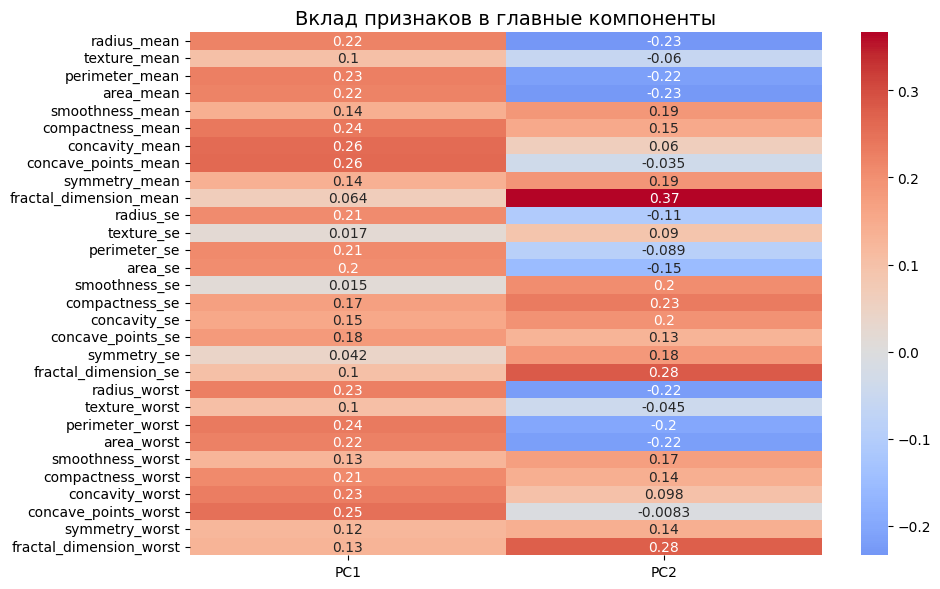


Топ-3 важных признака для PC1:
concave_points_mean     0.260854
concavity_mean          0.258400
concave_points_worst    0.250886
compactness_mean        0.239285
perimeter_worst         0.236640
Name: PC1, dtype: float64

Топ-3 важных признака для PC2:
fractal_dimension_mean     0.366575
fractal_dimension_se       0.280092
fractal_dimension_worst    0.275339
radius_mean                0.233857
compactness_se             0.232716
Name: PC2, dtype: float64


In [106]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns = ['PC1','PC2'],
    index = X.columns
)

# Визуализация вклада признаков в главные компоненты с помощью тепловой карты
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap = 'coolwarm', center = 0) 
plt.title('Вклад признаков в главные компоненты', fontsize=14)
plt.tight_layout()
plt.show()

# Выводим три наиболее значимых признака для каждой главной компоненты
print("\nТоп-3 важных признака для PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())  # Сортируем по абсолютному значению вклада

print("\nТоп-3 важных признака для PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())  # Аналогично для второй компоненты

In [107]:
with open('Cancer_Data_model.pkl', 'wb') as f:
    pickle.dump(Grid, f)

In [109]:
X.columns.to_list()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']